# 1. MySQL 데이터 불러오기

### 판례본문 - 상속

In [3]:
import pandas as pd

# CSV 파일 경로
csv_file_path = r'C:\Users\82102\Downloads\no-f\NoF\temp_jh\판례이유전처리.csv' #해당하는 경로로 변경

# CSV 파일 불러오기
df_inheritance = pd.read_csv(csv_file_path)


# 불러온 데이터 확인
print(df_inheritance.head())

                                        판례내용_이유(전처리)
0  상고이유를 판단한다. 1. 사안의 개요 가. 사실관계 원심판결 이유와 기록에 따르면...
1  상고이유를 판단한다. 1. 원심판결 이유와 기록에 따르면, 다음의 사실을 알 수 있...
2  상고이유(상고이유서 제출기간이 지난 후에 제출된 상고이유보충서 기재는 상고이유를 보...
3  상고이유를 판단한다. 1. 유증은 유언으로 수증자에게 일정한 재산을 무상으로 주기로...
4  1. 처분의 경위 가. 당사자의 지위 등 소외 2는 2013. 10. 17. 유언을...


# 2. 데이터 전처리 하기 

In [4]:
# 데이터 처리 및 분석
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 문자
import re

In [5]:
import pandas as pd

# 한글 깨짐 방지
plt.rcParams['font.family'] = "Malgun Gothic"

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

불용어 제거하기

In [6]:
#한국어 처리를 의한 라이브러리 사용 
# Counter: 데이터를 카운팅하여 빈도수를 계산하기 위한 모듈, 주로 단어 빈도 계산에 사용
from collections import Counter

# konlpy의 Okt: 한국어 형태소 분석기. 텍스트를 형태소 단위로 분리하거나 품사 태깅에 사용
from konlpy.tag import Okt

# CountVectorizer: 문서에서 단어 빈도 수를 기반으로 피처 벡터를 생성하는 사이킷런의 도구
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
import pandas as pd
import re  # 정규 표현식 모듈
from konlpy.tag import Okt

# 불용어 파일 로드
stopwords_file_path = r'C:\Users\82102\Downloads\no-f\NoF\temp_jh\sorted_words_20241022.txt'
stopwords_pick = ['제', '호로', '등', '것', '항', '의', '금', '검사', '판결', '거나', '유1', 
                  '상고이유', '기초', '사실', '기초사실', '사고', '피고', '원고', '피고인', 
                  '사건', '담당', '변호사', '변호인', '변론', '종결', '소외', '이라', '한다', 
                  '하여','으로부터', ').', '이라는', '따르면', '이고', '과는', '다가', '내렸으나',
                  '있던', '없으므로', '에는', '000', '있는', '하기로', '이라고', '하였고', '의하여',
                  '이를', '있고', '하게', '없는', '라고', '되지', '있다고', '의하면', '지는',
                  '있어', '하였다고', '없다고', '아니한', '없이', '있어', '하였다고', '없다고', '아니한',
                  '없이', '속인', '이건', '인한', '하였', '받은', '있어서', '정당하고', '상대로', '그렇다면',
                  '것임'
                  ]

pattern =  r'제\d+|\d+호증|\d+호|\d+달러|\d+원|\d+만원|\d+만|\d+억|\d+억원'  # 정규 표현식 패턴

# 불용어 파일을 읽어 불용어 목록 생성
with open(stopwords_file_path, 'r', encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())

# 불용어 제거 함수 (리스트 상태로 처리)
def remove_stopwords(content):

    if pd.isna(content):  # NaN 값 체크
        return ''
    
    # Okt 객체를 생성하여 형태소 분석
    okt = Okt()
    
    # 형태소 분석을 통해 단어 리스트 생성
    tokens = okt.morphs(content)  # 형태소 단위로 분리
    filtered_words = [
        word for word in tokens 
        if len(word) > 1 
        and word not in stopwords 
        and not word.isdigit()  # 숫자인 경우 제외
        and word not in stopwords_pick 
        and not re.match(pattern, word)
    ]
    return ' '.join(filtered_words)  # 문자열로 반환

# 불용어 제거 수행 (판례내용 열의 내용을 처리)
df_inheritance['판례내용_제거(불용어)'] = df_inheritance['판례내용_이유(전처리)'].apply(remove_stopwords)
# 결과 확인
print(df_inheritance['판례내용_제거(불용어)'])


0       개요 사실관계 망인 은행 예금 채권 은행 판매 투자신탁 형태 MMF Money Ma...
1       인과 대한민국 혼인신고 마쳤고 자녀 1973년 1978년 미합중국 캘리포니아 출생 ...
2       지난 보충 보충 상속세 증여 세법 개정 되기 전의 증세 19조 거주 자의 사망 배우...
3       유증 유언 증자 일정한 재산 무상 주기 단독행위 사인증여 증여 생전 무상 재산 수여...
4       지위 유언 남기지 사망 아내 자녀 상속세 신고 부과 경과 한꺼 표시 상속세 신고 남...
                              ...                        
4157    안컨대 목록 부동산 4285.9 전라남도 관재 대금 1,067,400 낙찰 4286...
4158    개론 오면 생모 순덕 중매 의논 망부 김준 밀양 금융조합 채무 변제 본건 가옥 경매...
4159    본건 부동산 단기 4282년 8월 1일 관재 당국 임차 가족 동거 본건 재결 하였다...
4160    안컨대 모되 장남 양수호 부첩 맺어 사변 침점 사망 쌍방 다툼 임의 호주 상속인 본...
4161    어업권 물권 단정하에 어업권 공유 어업 법규 고찰 정시 어업권 법적 성질 판이한 이...
Name: 판례내용_제거(불용어), Length: 4162, dtype: object


In [9]:
df_inheritance.to_csv(r'C:\Users\82102\Downloads\no-f\NoF\temp_jh\판례내용_제거(불용어).csv')

In [37]:
import pandas as pd

# CSV 파일 경로
csv_file_path = r'C:\Users\82102\Downloads\no-f\NoF\temp_jh\판례내용_제거(불용어).csv' #해당하는 경로로 변경

# CSV 파일 불러오기
df_inheritance = pd.read_csv(csv_file_path)

df_inheritance.drop(columns='Unnamed: 0', inplace=True)

# 불러온 데이터 확인
print(df_inheritance.head())

                                        판례내용_이유(전처리)  \
0  상고이유를 판단한다. 1. 사안의 개요 가. 사실관계 원심판결 이유와 기록에 따르면...   
1  상고이유를 판단한다. 1. 원심판결 이유와 기록에 따르면, 다음의 사실을 알 수 있...   
2  상고이유(상고이유서 제출기간이 지난 후에 제출된 상고이유보충서 기재는 상고이유를 보...   
3  상고이유를 판단한다. 1. 유증은 유언으로 수증자에게 일정한 재산을 무상으로 주기로...   
4  1. 처분의 경위 가. 당사자의 지위 등 소외 2는 2013. 10. 17. 유언을...   

                                        판례내용_제거(불용어)  
0  개요 사실관계 망인 은행 예금 채권 은행 판매 투자신탁 형태 MMF Money Ma...  
1  인과 대한민국 혼인신고 마쳤고 자녀 1973년 1978년 미합중국 캘리포니아 출생 ...  
2  지난 보충 보충 상속세 증여 세법 개정 되기 전의 증세 19조 거주 자의 사망 배우...  
3  유증 유언 증자 일정한 재산 무상 주기 단독행위 사인증여 증여 생전 무상 재산 수여...  
4  지위 유언 남기지 사망 아내 자녀 상속세 신고 부과 경과 한꺼 표시 상속세 신고 남...  


In [39]:
df_inheritance.fillna('',inplace=True)

In [40]:
df_inheritance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4162 entries, 0 to 4161
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   판례내용_이유(전처리)  4162 non-null   object
 1   판례내용_제거(불용어)  4162 non-null   object
dtypes: object(2)
memory usage: 65.2+ KB


## 2. 청크로 TF-IDF 수행

In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# 데이터프레임을 1000개씩 나눠서 처리할 준비
chunk_size = 1000

# 결과 저장 리스트 초기화
tfidf_result_all = []  # 전체 처리 결과를 저장할 리스트
tfidf_result_100 = []  # 상위 100개 결과를 저장할 리스트

print("처리 시작...")

# 1. 데이터를 청크로 나누어 처리
for i in range(0, len(df_inheritance), chunk_size):
    # 현재 청크 데이터 추출
    doc_chunk = df_inheritance['판례내용_제거(불용어)'][i:i + chunk_size]
    
    # 전체 단어를 사용한 TF-IDF 적용
    vectorizer_all = TfidfVectorizer()
    tfidf_array_all = vectorizer_all.fit_transform(doc_chunk)
    tfidf_result_all.append(pd.DataFrame(tfidf_array_all.toarray(), columns=vectorizer_all.get_feature_names_out()))
    
    # 상위 100개 단어를 사용한 TF-IDF 적용
    vectorizer_100 = TfidfVectorizer(max_features=100)
    tfidf_array_100 = vectorizer_100.fit_transform(doc_chunk)
    tfidf_result_100.append(pd.DataFrame(tfidf_array_100.toarray(), columns=vectorizer_100.get_feature_names_out()))
    
    # 청크 처리 완료 메시지 출력
    print(f"{min(i + chunk_size, len(df_inheritance))}개 문서 처리 완료")

# 2. 모든 청크 결과를 하나의 데이터프레임으로 합침
tfidf_df_all = pd.concat(tfidf_result_all, ignore_index=True)
tfidf_df_100 = pd.concat(tfidf_result_100, ignore_index=True)

# 3. 최종 결과 확인 (상위 5개 출력)
print("전체 단어 사용 TF-IDF 결과:")
print(tfidf_df_all.head())
print("상위 100개 단어 사용 TF-IDF 결과:")
print(tfidf_df_100.head())

# 4. 데이터프레임의 크기 및 처리 완료 메시지
print(f"전체 단어 사용 TF-IDF 처리 완료. 최종 데이터프레임 크기: {tfidf_df_all.shape}")
print(f"상위 100개 단어 사용 TF-IDF 처리 완료. 최종 데이터프레임 크기: {tfidf_df_100.shape}")

처리 시작...
1000개 문서 처리 완료
2000개 문서 처리 완료
3000개 문서 처리 완료
4000개 문서 처리 완료
4162개 문서 처리 완료
전체 단어 사용 TF-IDF 결과:
    00  000  000000  0000000  00002  0001  00010  0001년  0002  0003119  ...  \
0  0.0  0.0     0.0      0.0    0.0   0.0    0.0    0.0   0.0      0.0  ...   
1  0.0  0.0     0.0      0.0    0.0   0.0    0.0    0.0   0.0      0.0  ...   
2  0.0  0.0     0.0      0.0    0.0   0.0    0.0    0.0   0.0      0.0  ...   
3  0.0  0.0     0.0      0.0    0.0   0.0    0.0    0.0   0.0      0.0  ...   
4  0.0  0.0     0.0      0.0    0.0   0.0    0.0    0.0   0.0      0.0  ...   

   획책  횡렬  횡취  횡탈  후대  후륜  후시  훔쳐내어  훨신  희극  
0 NaN NaN NaN NaN NaN NaN NaN   NaN NaN NaN  
1 NaN NaN NaN NaN NaN NaN NaN   NaN NaN NaN  
2 NaN NaN NaN NaN NaN NaN NaN   NaN NaN NaN  
3 NaN NaN NaN NaN NaN NaN NaN   NaN NaN NaN  
4 NaN NaN NaN NaN NaN NaN NaN   NaN NaN NaN  

[5 rows x 56276 columns]
상위 100개 단어 사용 TF-IDF 결과:
   000  000원        가액        개시        개정   거래        건물        결론        계산  \
0  0.0   0.0 

In [46]:
tfidf_df_all.head()

,00,000,000000,0000000,00002,0001,00010,0001년,0002,0003119,...,획책,횡렬,횡취,횡탈,후대,후륜,후시,훔쳐내어,훨신,희극
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### tf-idf비교 워드클라우드(차이가 많은지 보려고)

* tf-idf값을 합산으로 처리할경우 단어가 문서 내에서 많이 등장할 때 그 단어의 중요도가 과대 평가될 수 있음, 
평균으로 처리할 경우 특정 단어가 여러 문서에서 고르게 나타나면 그 중요도가 더 정확히 반영되므로 일관된 평가가 중요할때 유용함

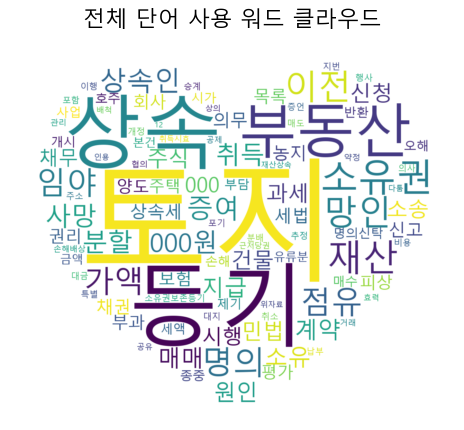

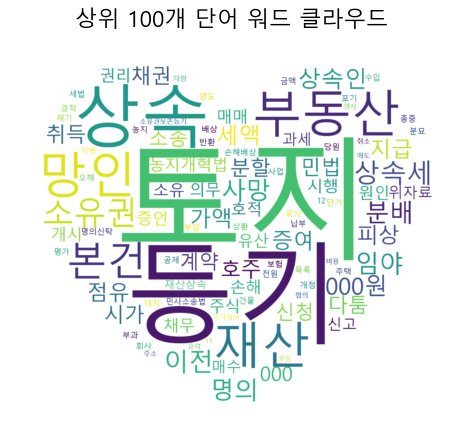

In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에서의 경우
# MacOS의 경우 'AppleGothic.ttf' 같은 폰트 경로를 수정

# 하트 모양 마스크 이미지 경로 설정
mask_image_path = r'C:\Users\82102\Downloads\no-f\NoF\temp_jh\heart.png'  # 하트 모양 마스크 이미지 파일 경로

# 하트 모양 마스크 이미지 로드
mask = np.array(Image.open(mask_image_path))

# 1. 평균 TF-IDF 점수를 기반으로 워드 클라우드 생성
def create_wordcloud(tfidf_df, title):
    # TF-IDF 값의 평균을 계산하여 각 단어의 중요도를 평가
    tfidf_means = tfidf_df.mean(axis=0)
    tfidf_means = tfidf_means.sort_values(ascending=False).head(100)  # 평균계산한 상위 100개 단어만 선택

    # 워드 클라우드 생성
    wordcloud = WordCloud(
        font_path=font_path,  # 한글 폰트 경로 지정
        width=800, 
        height=400, 
        background_color='white', 
        prefer_horizontal=1,
        scale=1.5,
        collocations=False,  # 단어 간 겹침 방지
        mask=mask  # 하트 모양 마스크 적용
        ).generate_from_frequencies(tfidf_means)

    # 워드 클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # 축 제거
    plt.title(title, fontsize=16)
    plt.show()

# 2. 전체 단어 사용 TF-IDF 결과로 워드 클라우드 생성
create_wordcloud(tfidf_df_all, "전체 단어 사용 워드 클라우드")

# 3. 상위 100개 단어 사용 TF-IDF 결과로 워드 클라우드 생성
create_wordcloud(tfidf_df_100, "상위 100개 단어 워드 클라우드")


In [34]:
tfidf_df_100

,0
0,"(0, 13)\t0.23757306251842275\n (0, 54)\t0.0..."
1,"(0, 34)\t0.03274086202533246\n (0, 49)\t0.0..."
2,"(0, 13)\t0.08350722809047896\n (0, 84)\t0.1..."
3,"(0, 34)\t0.08890441919168618\n (0, 79)\t0.0..."
4,"(0, 13)\t0.1119264233466194\n (0, 84)\t0.03..."
...,...
157,"(0, 54)\t0.1297536572138652\n (0, 84)\t0.09..."
158,"(0, 54)\t0.07778714282729995\n (0, 84)\t0.2..."
159,"(0, 13)\t0.10021120112479338\n (0, 34)\t0.0..."
160,"(0, 13)\t0.04462269716834852\n (0, 34)\t0.0..."


## K-Means

# 3. k-Means

    클러스터링 수 결정

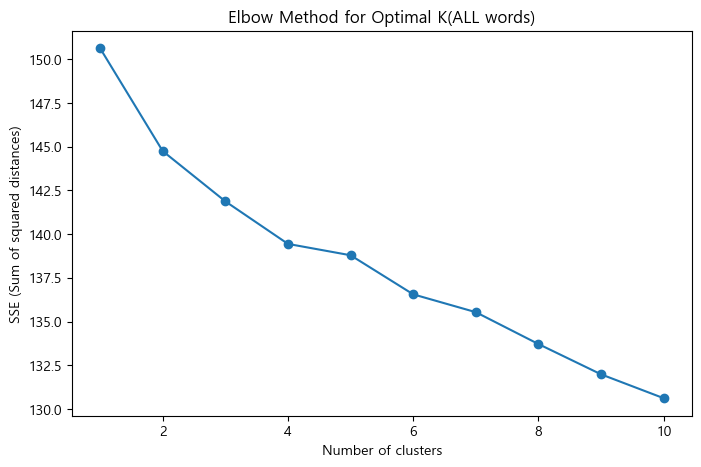

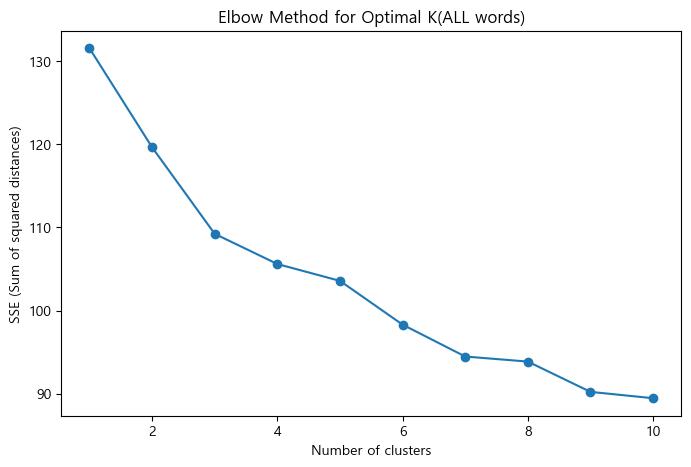

In [50]:
# 1. 엘보우(Elbow) 방법 : 클러스터링 수 결정
# 엘보우 방법은 클러스터 내 오차제곱합(SSE)을 계산하여 클러스터 수가 증가할 때 
# SSE의 감소가 급격히 완화되는 지점을 찾아 클러스터 수를 결정
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 클러스터 개수의 범위 설정 (1부터 10까지)
cluster_range = range(1, 11)
sse_all = []  # SSE 값을 저장할 리스트
sse_100 = []  # SSE 값을 저장할 리스트

# 전체 단어 사용 tf-idf 결과에 대한 sse계산
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(tfidf_array_all)  # TF-IDF로 벡터화된 데이터
    sse_all.append(kmeans.inertia_)  # inertia는 클러스터 내 오차제곱합(SSE)

# 상위 100개 사용 tf-idf 결과에 대한 sse계산
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(tfidf_array_100)  # TF-IDF로 벡터화된 데이터
    sse_100.append(kmeans.inertia_)  # inertia는 클러스터 내 오차제곱합(SSE)


# 엘보우 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, sse_all, marker='o')
plt.title('Elbow Method for Optimal K(ALL words)')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of squared distances)')
plt.show()

# 엘보우 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, sse_100, marker='o')
plt.title('Elbow Method for Optimal K(ALL words)')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of squared distances)')
plt.show()



해석:
SSE (오차 제곱합): 클러스터 내부의 각 데이터 포인트와 클러스터 중심 간의 거리 합을 의미하며, 값이 낮을수록 데이터가 중심에 더 가까이 모여 있다는 것을 뜻합니다.
엘보우 포인트: 그래프에서 기울기가 급격히 완화되는 지점을 찾습니다. 이 지점 이후로는 클러스터 수를 더 증가시켜도 SSE 감소 폭이 작아지며, 효율성이 떨어지기 시작합니다.
최적 K 값 추정:
K = 2에서 그래프의 기울기가 급격히 완화되고 있습니다. 이 지점을 엘보우 포인트로 보고, 이 근처가 최적의 클러스터 수로 추정됩니다.

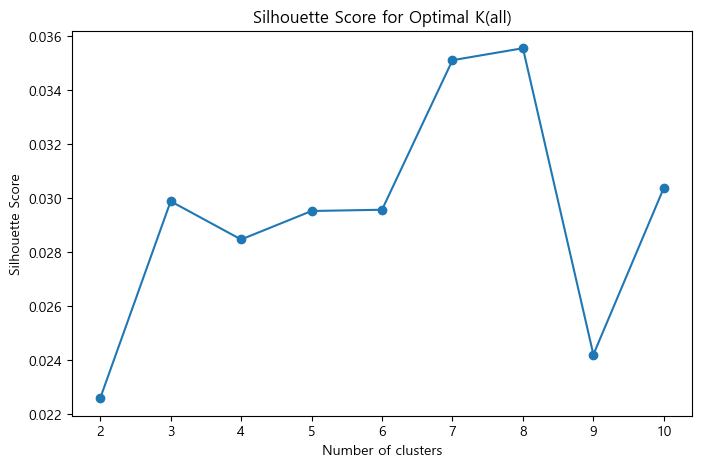

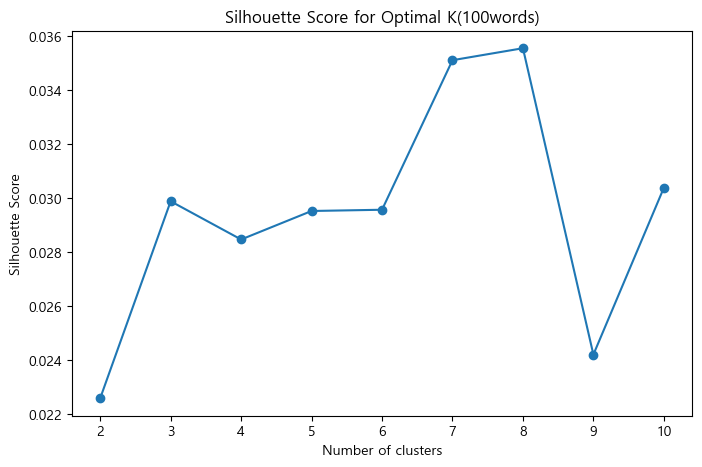

In [51]:
# 2. 실루엣(Silhouette) 점수 코드
# 실루엣 점수는 각 데이터 포인트가 얼마나 잘 속한 클러스터와 가까우며, 
# 다른 클러스터와는 얼마나 멀리 떨어져 있는지를 평가
# 값이 1에 가까울수록 클러스터링이 잘된 것

from sklearn.metrics import silhouette_score

# 클러스터 개수 범위 설정 (2부터 10까지)
silhouette_scores_all = []
silhouette_scores_100 = []

# 각 클러스터 개수에 대해 K-Means 모델 학습 및 실루엣 점수 계산
#전체단어
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)  # n_init 값을 명시적으로 10으로 설정
    clusters = kmeans.fit_predict(tfidf_array_all)
    silhouette_avg = silhouette_score(tfidf_array_all, clusters)
    silhouette_scores_all.append(silhouette_avg)

#상위100 TF-IDF
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)  # n_init 값을 명시적으로 10으로 설정
    clusters = kmeans.fit_predict(tfidf_array_100)
    silhouette_avg = silhouette_score(tfidf_array_100, clusters)
    silhouette_scores_100.append(silhouette_avg)

# 실루엣 점수 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores_all, marker='o')
plt.title('Silhouette Score for Optimal K(all)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# 실루엣 점수 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores_all, marker='o')
plt.title('Silhouette Score for Optimal K(100words)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [30]:
tfidf_df_all = pd.DataFrame(tfidf_array_all).fillna(0)
tfidf_df_100 = pd.DataFrame(tfidf_array_100).fillna(0)

In [59]:
tfidf_df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4162 entries, 0 to 4161
Columns: 56276 entries, 00 to 희극
dtypes: float64(56276)
memory usage: 1.7 GB


In [57]:
df_inheritance.head()

,판례내용_이유(전처리),판례내용_제거(불용어)
0,상고이유를 판단한다. 1. 사안의 개요 가. 사실관계 원심판결 이유와 기록에 따르면...,개요 사실관계 망인 은행 예금 채권 은행 판매 투자신탁 형태 MMF Money Ma...
1,"상고이유를 판단한다. 1. 원심판결 이유와 기록에 따르면, 다음의 사실을 알 수 있...",인과 대한민국 혼인신고 마쳤고 자녀 1973년 1978년 미합중국 캘리포니아 출생 ...
2,상고이유(상고이유서 제출기간이 지난 후에 제출된 상고이유보충서 기재는 상고이유를 보...,지난 보충 보충 상속세 증여 세법 개정 되기 전의 증세 19조 거주 자의 사망 배우...
3,상고이유를 판단한다. 1. 유증은 유언으로 수증자에게 일정한 재산을 무상으로 주기로...,유증 유언 증자 일정한 재산 무상 주기 단독행위 사인증여 증여 생전 무상 재산 수여...
4,1. 처분의 경위 가. 당사자의 지위 등 소외 2는 2013. 10. 17. 유언을...,지위 유언 남기지 사망 아내 자녀 상속세 신고 부과 경과 한꺼 표시 상속세 신고 남...


## 클러스터링

#### 전체

In [60]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

vectorizer = TfidfVectorizer()

tfidf_metrix = vectorizer.fit_transform(df_inheritance['판례내용_제거(불용어)'])

# 1. K-Means 클러스터링 설정
num_clusters = 8  # 원하는 클러스터 개수 설정
kmeans_all = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)  # n_init 값을 명시적으로 설정

# 2. K-Means 모델 학습
kmeans_all.fit(tfidf_metrix)

# 3. 클러스터 레이블을 데이터프레임에 추가
df_inheritance['클러스터(all)'] = kmeans_all.labels_

# 4. 클러스터링 결과 확인
print("클러스터링 결과:")
print(df_inheritance[['판례내용_제거(불용어)', '클러스터(all)']].head())

클러스터링 결과:
                                        판례내용_제거(불용어)  클러스터(all)
0  개요 사실관계 망인 은행 예금 채권 은행 판매 투자신탁 형태 MMF Money Ma...          0
1  인과 대한민국 혼인신고 마쳤고 자녀 1973년 1978년 미합중국 캘리포니아 출생 ...          0
2  지난 보충 보충 상속세 증여 세법 개정 되기 전의 증세 19조 거주 자의 사망 배우...          2
3  유증 유언 증자 일정한 재산 무상 주기 단독행위 사인증여 증여 생전 무상 재산 수여...          0
4  지위 유언 남기지 사망 아내 자녀 상속세 신고 부과 경과 한꺼 표시 상속세 신고 남...          2


In [76]:
df_inheritance['클러스터(all)'].value_counts()

클러스터(all)
0    1530
7     546
4     533
5     469
6     464
2     296
1     237
3      87
Name: count, dtype: int64

#### 상위100개

In [61]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np


vectorizer_100 = TfidfVectorizer(max_features=100)

tfidf_metrix_100 = vectorizer_100.fit_transform(df_inheritance['판례내용_제거(불용어)'])

# 1. K-Means 클러스터링 설정
num_clusters = 8  # 원하는 클러스터 개수 설정
kmeans_100 = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)  # n_init 값을 명시적으로 설정

# 2. K-Means 모델 학습
kmeans_100.fit(tfidf_metrix_100)

# 3. 클러스터 레이블을 데이터프레임에 추가
df_inheritance['클러스터(100)'] = kmeans_100.labels_

# 4. 클러스터링 결과 확인
print("클러스터링 결과:")
print(df_inheritance[['판례내용_제거(불용어)', '클러스터(100)']].head())

클러스터링 결과:
                                        판례내용_제거(불용어)  클러스터(100)
0  개요 사실관계 망인 은행 예금 채권 은행 판매 투자신탁 형태 MMF Money Ma...          1
1  인과 대한민국 혼인신고 마쳤고 자녀 1973년 1978년 미합중국 캘리포니아 출생 ...          1
2  지난 보충 보충 상속세 증여 세법 개정 되기 전의 증세 19조 거주 자의 사망 배우...          1
3  유증 유언 증자 일정한 재산 무상 주기 단독행위 사인증여 증여 생전 무상 재산 수여...          0
4  지위 유언 남기지 사망 아내 자녀 상속세 신고 부과 경과 한꺼 표시 상속세 신고 남...          1


In [77]:
df_inheritance['클러스터(100)'].value_counts()

클러스터(100)
3    880
2    625
7    603
4    593
1    525
6    381
0    312
5    243
Name: count, dtype: int64

In [70]:
df_inheritance.to_csv(r'C:\Users\82102\Downloads\no-f\NoF\temp_jh\df_cluster_add.csv',index=False)

In [63]:
# 클러스터 중심 단어 추출 함수
def extract_cluster_keywords(kmeans, feature_names, num_clusters):
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]  # 각 클러스터의 중심 단어 인덱스 정렬

    # 클러스터 중심 단어를 저장할 딕셔너리
    cluster_keywords = {}

    for i in range(num_clusters):
        cluster_keywords[i] = []  # 각 클러스터에 대한 빈 리스트 생성
        for ind in order_centroids[i, :10]:  # 각 클러스터에서 상위 10개 단어
            if ind < len(feature_names):  # 인덱스가 피처 수보다 작은지 확인
                cluster_keywords[i].append(feature_names[ind])  # 중심 단어를 리스트에 추가
            else:
                cluster_keywords[i].append("N/A")  # 유효하지 않은 인덱스에 대한 처리
    return cluster_keywords

# 전체 TF-IDF 데이터의 클러스터 중심 단어 추출
vectorizer_all = TfidfVectorizer()
vectorizer_all.fit_transform(df_inheritance['판례내용_제거(불용어)'])
feature_names_all = vectorizer_all.get_feature_names_out()  # 전체 단어 목록
cluster_keywords_all = extract_cluster_keywords(kmeans_all, feature_names_all, num_clusters)

# 상위 100개 TF-IDF 데이터의 클러스터 중심 단어 추출
vectorizer_100 = TfidfVectorizer(max_features=100)
vectorizer_100.fit_transform(df_inheritance['판례내용_제거(불용어)'])
feature_names_100 = vectorizer_100.get_feature_names_out()  # 100개 단어 목록
cluster_keywords_100 = extract_cluster_keywords(kmeans_100, feature_names_100, num_clusters)

# 클러스터 중심 단어 리스트 확인
print("\n전체 단어 사용 TF-IDF 클러스터 중심 단어:")
for cluster_num, keywords in cluster_keywords_all.items():
    print(f"클러스터 {cluster_num + 1}: {keywords}")

print("\n상위 100개 단어 사용 TF-IDF 클러스터 중심 단어:")
for cluster_num, keywords in cluster_keywords_100.items():
    print(f"클러스터 {cluster_num + 1}: {keywords}")



전체 단어 사용 TF-IDF 클러스터 중심 단어:
클러스터 1: ['신청', '상속', '주택', '토지', '계약', '부동산', '사망', '건물', '호주', '채권']
클러스터 2: ['임야', '종중', '등기', '소유권', '명의', '이전', '분묘', '소유권보존등기', '소유', '점유']
클러스터 3: ['상속', '재산', '분할', '상속인', '한정승인', '포기', '부동산', '피상', '민법', '채무']
클러스터 4: ['유류분', '반환', '증여', '재산', '망인', '부동산', '상속', '유증', '유류분권', '가액']
클러스터 5: ['가액', '상속세', '과세', '상속', '세법', '평가', '재산', '주식', '시가', '세액']
클러스터 6: ['토지', '점유', '등기', '소유권', '이전', '농지', '분할', '소유', '환지', '명의']
클러스터 7: ['망인', '보험', '000원', '손해', '지급', '위자료', '손해배상', '차량', '000', '유족']
클러스터 8: ['등기', '소유권', '부동산', '이전', '명의', '토지', '원인', '명의신탁', '상속', '매매']

상위 100개 단어 사용 TF-IDF 클러스터 중심 단어:
클러스터 1: ['망인', '000원', '손해', '사망', '000', '손해배상', '지급', '의무', '상속', '재산']
클러스터 2: ['상속', '재산', '상속인', '분할', '민법', '부동산', '사망', '피상', '채무', '개시']
클러스터 3: ['토지', '등기', '점유', '소유권', '이전', '명의', '소유', '농지', '취득', '분할']
클러스터 4: ['신청', '계약', '회사', '건물', '주택', '채권', '권리', '소송', '사업', '사망']
클러스터 5: ['가액', '상속세', '과세', '세법', '상속', '주식', '재산', '세액', '증여', '부과']
클러스터

#### 평가하기

상위 100개 클러스터링 실루엣 스코어: 0.10285467114836805
상위 100개 클러스터 크기:
[312 525 625 880 593 243 381 603]


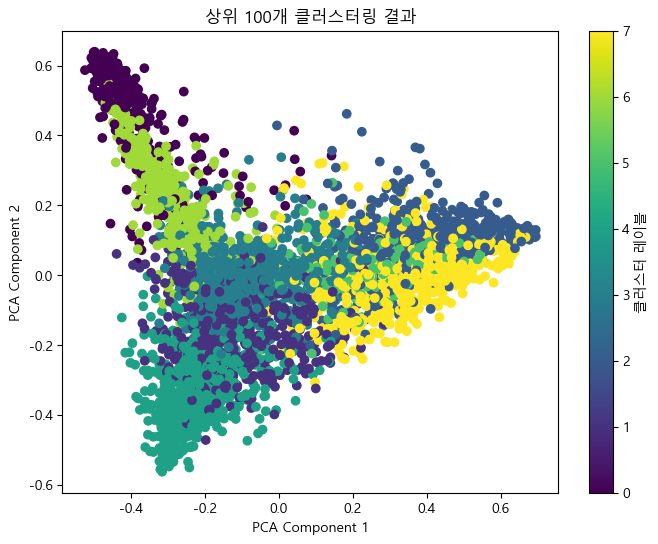

In [79]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 실루엣 스코어
silhouette_100 = silhouette_score(tfidf_metrix_100, kmeans_100.labels_)
print(f"상위 100개 클러스터링 실루엣 스코어: {silhouette_100}")

# 클러스터 크기
cluster_sizes_100 = np.bincount(kmeans_100.labels_)
print("상위 100개 클러스터 크기:")
print(cluster_sizes_100)

# PCA 시각화
pca_100 = PCA(n_components=2)
pca_result_100 = pca_100.fit_transform(tfidf_metrix_100.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(pca_result_100[:, 0], pca_result_100[:, 1], c=kmeans_100.labels_, cmap='viridis')
plt.title("상위 100개 클러스터링 결과")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='클러스터 레이블')
plt.show()

전체 클러스터링 실루엣 스코어: 0.019925573780935145
전체 클러스터 크기:
[1530  237  296   87  533  469  464  546]


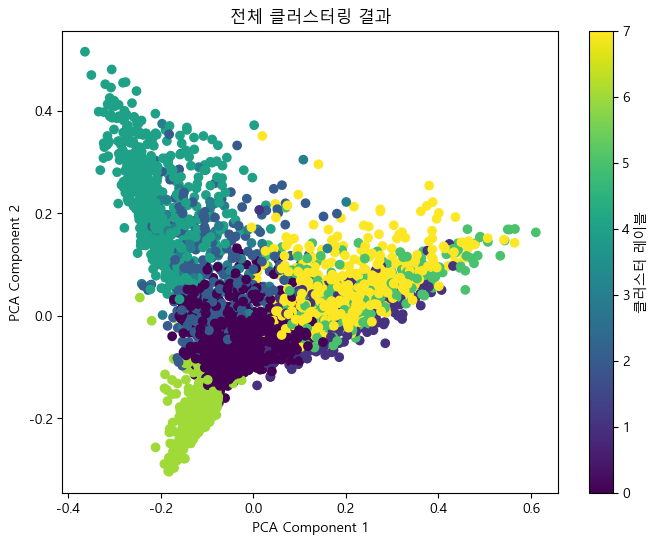

In [81]:
# 실루엣 스코어
silhouette_all = silhouette_score(tfidf_metrix, kmeans_all.labels_)
print(f"전체 클러스터링 실루엣 스코어: {silhouette_all}")

# 클러스터 크기
cluster_sizes_all = np.bincount(kmeans_all.labels_)
print("전체 클러스터 크기:")
print(cluster_sizes_all)

# PCA 시각화
pca_all = PCA(n_components=2)
pca_result_all = pca_all.fit_transform(tfidf_metrix.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(pca_result_all[:, 0], pca_result_all[:, 1], c=kmeans_all.labels_, cmap='viridis')
plt.title("전체 클러스터링 결과")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='클러스터 레이블')
plt.show()